In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
Sales_data = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Retail Sales Prediction\sales_data_set.csv")
#Merging with Sales Dataset
Feat_sales = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Retail Sales Prediction\Features_data_set.csv")
combined_df = pd.merge(Sales_data,Feat_sales.drop(['IsHoliday'],axis=1),how='left',on=['Store','Date'])
# Merging Store_data with the sales data
Store_data = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Capstone\Retail Sales Prediction\stores_data_set.csv")
merged_df = pd.merge(combined_df,Store_data,how='left',on=['Store'])
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [3]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [4]:
merged_df.shape

(421570, 16)

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [6]:
merged_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

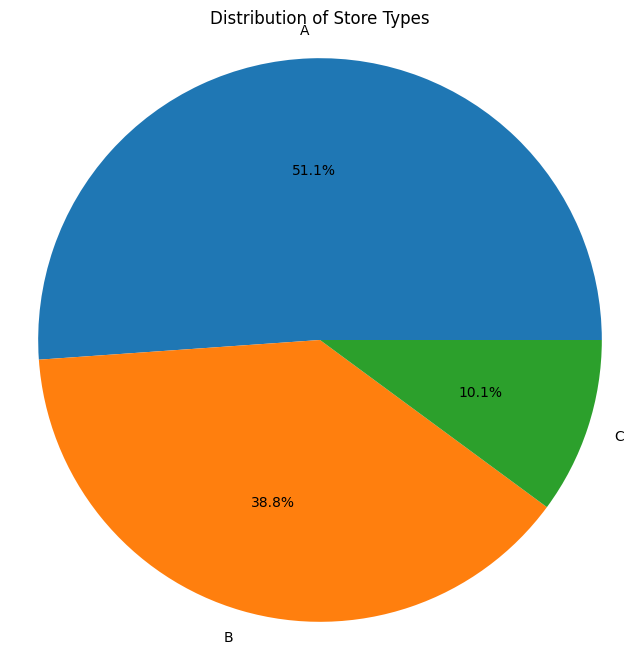

In [7]:
store_types = merged_df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(store_types, labels=store_types.index, autopct='%1.1f%%')
plt.title('Distribution of Store Types')
plt.axis('equal')
plt.show()

In [8]:
merged_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

## Fill NA Values 

### Fill Markdown NA values with '0'

In [9]:
markdown_features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for feature in markdown_features:
    merged_df[feature].fillna(0, inplace=True)

In [10]:
merged_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

## Data Preprocessing

In [11]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'],dayfirst=True)
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week

In [12]:
merged_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Month                    int32
Year                     int32
Week                    UInt32
dtype: object

In [13]:
merged_df.to_csv('Sales_data.csv',index=False)

## EDA

In [14]:
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
MarkDown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
MarkDown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453
MarkDown4,421570.0,1083.132268,0.0,0.0,0.0,425.29,67474.85,3894.529945


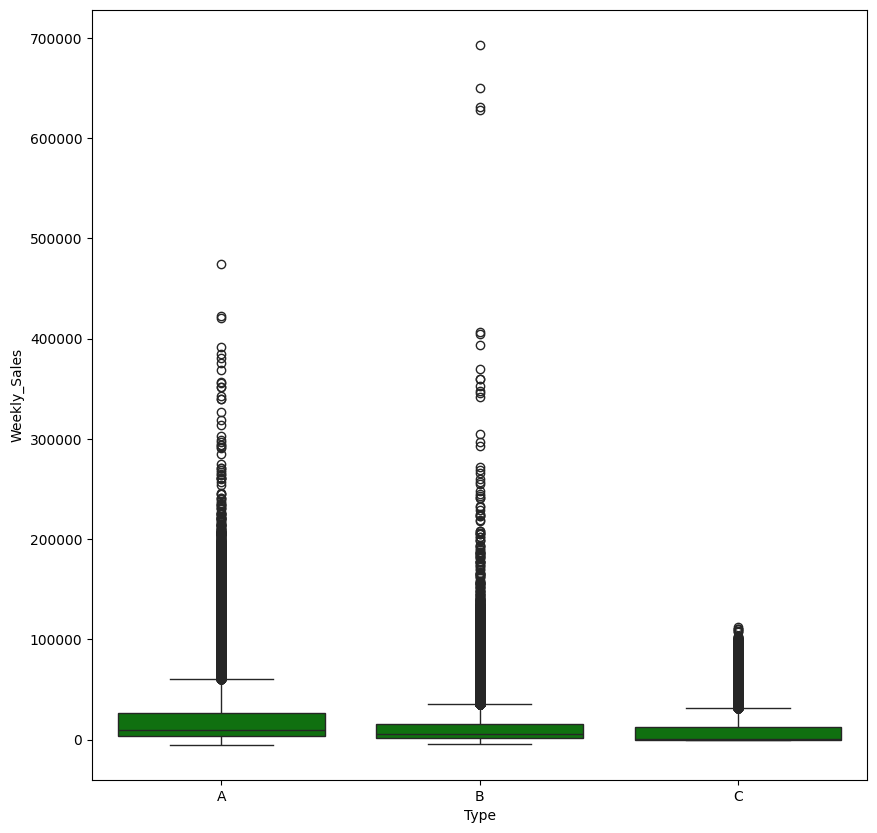

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(data=merged_df,y="Weekly_Sales",x="Type",color="green")
plt.show()

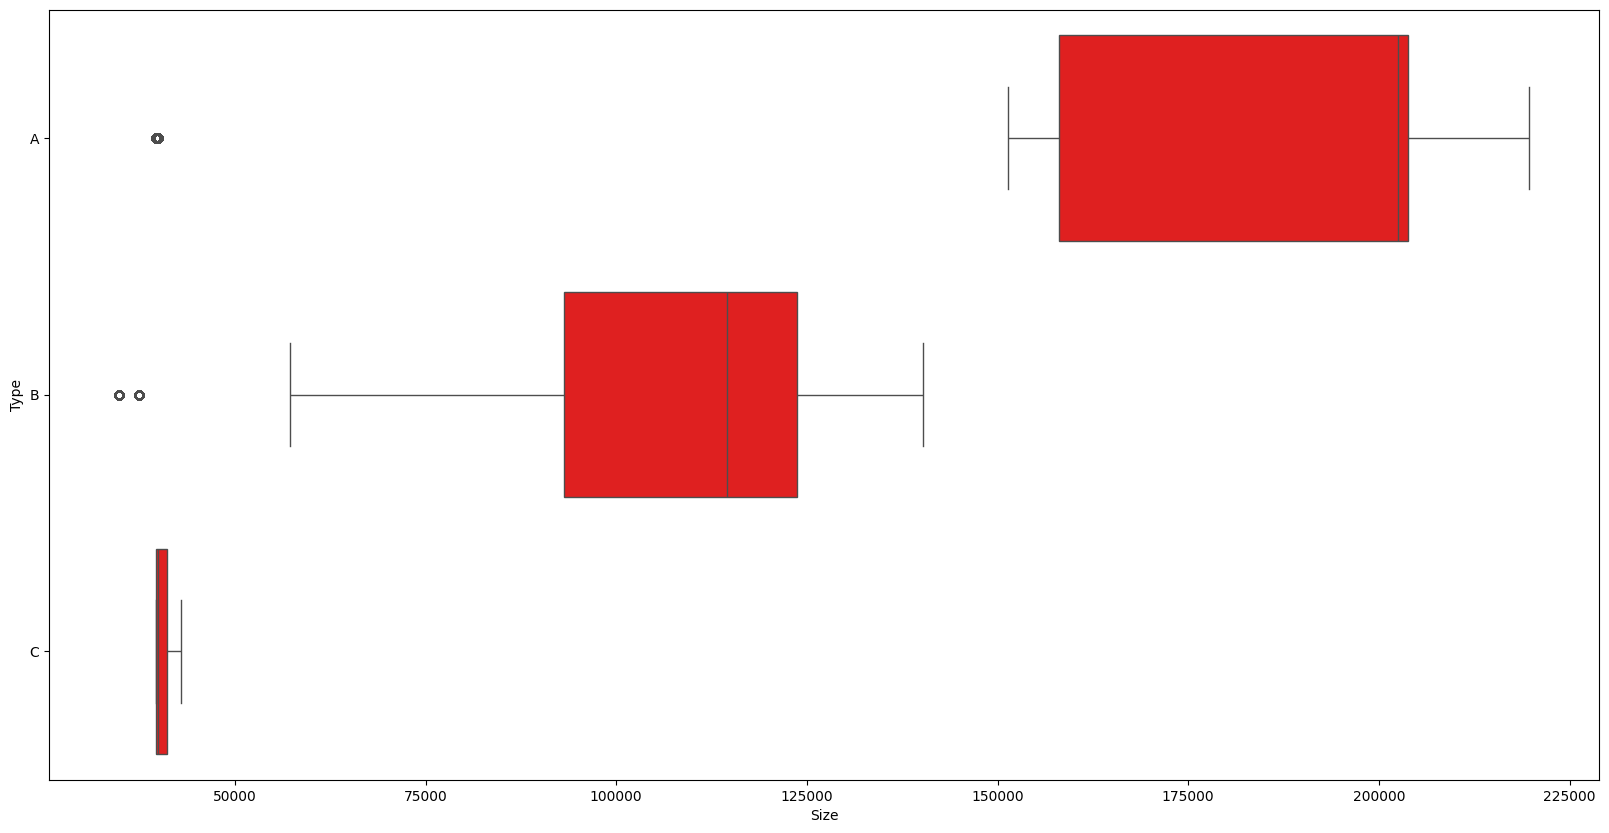

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(data=merged_df,x="Size",y="Type",color="red")
plt.show()

## Encoding

In [17]:
merged_df['IsHoliday'] = merged_df['IsHoliday'].astype(int)

In [18]:
label_encoder = LabelEncoder()
merged_df['Type'] = label_encoder.fit_transform(merged_df['Type'])

In [19]:
merged_df['IsHoliday'].unique()

array([0, 1])

In [20]:
merged_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
Year            0
Week            0
dtype: int64

In [21]:
merged_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                     int32
Size                     int64
Month                    int32
Year                     int32
Week                    UInt32
dtype: object

## Scaling

In [22]:
X = merged_df.drop(['Weekly_Sales','Date'],axis=1)
y = merged_df['Weekly_Sales']

#Standard Scaler
scaler_classify = StandardScaler()
X_scale = scaler_classify.fit_transform(X)

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(337256, 17) (84314, 17) (337256,) (84314,)


## Model Fitting

In [24]:
ln_regressor =LinearRegression()
ln_regressor.fit(X_train,y_train)
y_pred_ln = ln_regressor.predict(X_test)

ln_MAE = mean_absolute_error(y_test,y_pred_ln)
ln_RMSE = np.sqrt(mean_squared_error(y_test,y_pred_ln))
ln_AS = ln_regressor.score(X_test,y_test)

print(f"Mean Absolute Error (MSE) {ln_MAE}")
print(f"Root Mean Squared Error (MSE) {ln_RMSE}")
print(f"Accuracy Score (AS) {ln_AS}")

Mean Absolute Error (MSE) 14551.838364662146
Root Mean Squared Error (MSE) 21789.215143215937
Accuracy Score (AS) 0.08955646039425247


In [25]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)
y_pred_rf = rf_regressor.predict(X_test)

rf_MSE = mean_absolute_error(y_test,y_pred_rf)
rf_MAE  =np.sqrt(mean_squared_error(y_test,y_pred_rf))
rf_AS = rf_regressor.score(X_test,y_test)

print(f"Mean Squared Error (MSE) : {rf_MSE}")
print(f"Mean Absolute Error (MAE) : {rf_MAE}")
print(f"Accuracy Score (AS) : {rf_AS}")

Mean Squared Error (MSE) : 1445.0442857283488
Mean Absolute Error (MAE) : 3723.769840023247
Accuracy Score (AS) : 0.9734089488948482


In [26]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train,y_train)
y_pred_xgb = xgb_regressor.predict(X_test)

xgb_MSE = mean_absolute_error(y_test,y_pred_xgb)
xgb_RMSE = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
xgb_AS = xgb_regressor.score(X_test,y_test)
xgb_R2 = r2_score(y_test,y_pred_xgb)

print(f"Mean Absolute Error (MSE) : {xgb_MSE}")
print(f"Root Mean Squared Error (RMSE) : {xgb_RMSE}")
print(f"R2 Score (r2) :{xgb_R2}")

Mean Absolute Error (MSE) : 3024.75559374318
Root Mean Squared Error (RMSE) : 5430.0069381994
R2 Score (r2) :0.9434580719702556


In [27]:
import pickle
file_path='RandomForestRegressor.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(rf_regressor, file)
print(f'Pickle file created: {file_path}')

Pickle file created: RandomForestRegressor.pkl


In [28]:
with open('RandomForestRegressor.pkl', 'rb') as file:
    rf_regressor = pickle.load(file)

rf_regressor

RandomForestRegressor()

In [37]:
import pickle
file_path2='XGBRegressor.pkl'
with open(file_path2, 'wb') as file:
    pickle.dump(xgb_regressor, file)
print(f'Pickle file created: {file_path2}')

Pickle file created: XGBRegressor.pkl


In [38]:
with open('XGBRegressor.pkl', 'rb') as file:
    xgb_regressor = pickle.load(file)

xgb_regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
merged_df.iloc[26243]

Store                             3
Dept                             46
Date            2011-03-11 00:00:00
Weekly_Sales                6048.96
IsHoliday                         0
Temperature                   61.29
Fuel_Price                    3.459
MarkDown1                       0.0
MarkDown2                       0.0
MarkDown3                       0.0
MarkDown4                       0.0
MarkDown5                       0.0
CPI                      217.465368
Unemployment                  7.551
Type                              1
Size                          37392
Month                             3
Year                           2011
Week                             10
Name: 26243, dtype: object

In [33]:
merged_df['Year'].unique()

array([2010, 2011, 2012])

In [34]:
merged_df['Week'].unique()

<IntegerArray>
[ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,  4]
Length: 52, dtype: UInt32

In [39]:
merged_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
Year            0
Week            0
dtype: int64

In [36]:
user_data = np.array([[3,46,0,61.29,3.459,0.0,0.0,0.0,0.0,0.0,217.465368,7.551,1,37392,3,2011,10]])

# Standardize the user data if necessary
scaler = StandardScaler()
user_data_scaled = scaler.fit_transform(user_data)

# Make a prediction
y_pred = xgb_regressor.predict(user_data_scaled)
print(y_pred)

[5122.362]
